In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_matrices():

    ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')

    # generate x, y, z co-ords and concat into matrix
    theta = np.linspace(-10, 10, 50)

    A_z = np.linspace(-2, 2, 50)
    r = A_z**2 + 5
    A_x = r * np.sin(theta)
    A_y = r * np.cos(theta)

    B_z = np.linspace(-2, 2, 50)
    q = B_z**2 + 5 
    B_x = q * np.cos(theta) # switch sin and cos for x and y 
    B_y = q * np.sin(theta)

    ax.plot(A_x, A_y, A_z, label='A', linestyle='dashed')
    ax.plot(B_x, B_y, B_z, label='B', linestyle='dashed')
    ax.legend(loc='upper left', fontsize=20)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    ax.set_zlabel('Z', fontsize=20)

    plt.savefig('A_B_original.png')
    plt.show()
    plt.close()

    # extract points into matrix
    A = np.array([A_x, A_y, A_z], dtype='float32')
    B = np.array([B_x, B_y, B_z], dtype='float32')

    return A, B

In [2]:
# 2 translate A and B so their centroids are on the origin (0,0,0) - do this by subtracting from each element the average of the whole column
def translate_to_origin(A, B):

    # find and store mean value for each column (x, y, z)
    Ax_mean, Ay_mean, Az_mean = np.mean(A, axis=1)
    Bx_mean, By_mean, Bz_mean = np.mean(B, axis=1)

    # A and B can be split into 3 cols of x,y,z co-ords
    A_x, A_y, A_z = A
    B_x, B_y, B_z = B
    
    # set up lists of cols and means to iterate through
    columns = [A_x, A_y, A_z, B_x, B_y, B_z] 
    means = [Ax_mean, Ay_mean, Az_mean, Bx_mean, By_mean, Bz_mean]

    # set up empty matrices to hold updated values
    translated_matrices = np.empty(shape=(6,50))
    translated_column = np.empty(shape=(1,50))

    # iterate through column values and substract column mean for each col in each matrix
    subtract = lambda column: column - mean
    subtract_func = np.vectorize(subtract)

    for column, mean in zip(columns, means):
        #print('MEAN: ', mean)
        #print('COLUMN: ', column[0,1])
        translated_column = subtract_func(column)
        #print('TRANSLATED COL: ', translated_column[0,1])
        np.append(translated_matrices, translated_column)
    
    # separate results back into the two respective matrices A and B 
    A_translated = translated_matrices[0:3, 0:50]
    B_translated = translated_matrices[3:6, 0:50]

    ax2 = plt.figure(figsize=(15,15)).add_subplot(projection='3d')

    Ax_trans, Ay_trans, Az_trans = A_translated
    Bx_trans, By_trans, Bz_trans = B_translated

    ax2.plot(Ax_trans, Ay_trans, Az_trans, label='A translated', linestyle='dashed')
    ax2.plot(Bx_trans, By_trans, Bz_trans, label='B translated', linestyle='dashed')
    ax2.legend(loc='upper left', fontsize=20)
    ax2.set_xlabel('X', fontsize=20)
    ax2.set_ylabel('Y', fontsize=20)
    ax2.set_zlabel('Z', fontsize=20)

    plt.savefig('A_B_translated.png')
    plt.show()
    plt.close()

    return A_translated, B_translated, means




In [3]:
def compute_covariance_matrix(A_translated, B_translated):
    
    # multiply Bt (transposed) by A (gives H)
    H = np.matmul(B_translated.T, A_translated)

    return H 



In [4]:

def compute_optimal_rotation_matrix(H):
    
    # find SVD of H 
    U, S, V = np.linalg.svd(H) # np.linalg.svd returns transpose of V
    Vt = V
    # keep matrices 1 and 3 from the decomposition (U and V) - will be Vt if python svd gives transposed V
    # rotation matrix R is Vt x Ut (transposed U) (transpose V if not given as transposed)
    R = np.matmul(Vt, U.T)
    
    return R


In [5]:


def apply_rotation(A_translated, R):

    # to get rotated A, multiply A x R
    A_rotated = np.matmul(A_translated, R)

    return A_rotated



In [6]:

# 4 translate A back to where B originally was centered (add back averages to matrix columns)
def revert_translation(means, B_translated, A_rotated):

    # A and B can be split into 3 cols of x,y,z co-ords
    Ax_rot, Ay_rot, Az_rot = A_rotated
    Bx_rot, By_rot, Bz_rot = B_translated

    rotated_columns = [Ax_rot, Ay_rot, Az_rot, Bx_rot, By_rot, Bz_rot]

    # set up empty matrices to hold updated values
    reverted_matrices = np.empty(shape=(6,50))
    reverted_column = np.empty(shape=(1,50))

    # iterate through column values and substract column mean for each col in each matrix
    add = lambda rotated_column: rotated_column + mean
    add_func = np.vectorize(add)

    for rotated_column, mean in zip(rotated_columns, means):
        reverted_column = add_func(rotated_column)
        np.append(reverted_matrices, reverted_column)
    
    # separate results back into the two respective matrices A and B 
    A_reverted = reverted_matrices[0:3, 0:50]
    B_reverted = reverted_matrices[3:6, 0:50]

    ax3 = plt.figure(figsize=(15,15)).add_subplot(projection='3d')

    Ax_rvt, Ay_rvt, Az_rvt = A_reverted
    Bx_rvt, By_rvt, Bz_rvt = B_reverted

    ax3.plot(Ax_rvt, Ay_rvt, Az_rvt, label='A_reverted',linestyle='dashed')
    ax3.plot(Bx_rvt, By_rvt, Bz_rvt, label='B_reverted', linestyle='dashed')
    ax3.legend(loc='upper left', fontsize=20)
    ax3.set_xlabel('X', fontsize=20)
    ax3.set_ylabel('Y', fontsize=20)
    ax3.set_zlabel('Z', fontsize=20)

    plt.savefig('A_B_reverted.png')
    plt.show()
    plt.close()

    return A_reverted, B_reverted



In [7]:

def run_kabsch():

    A, B = generate_matrices()
    print('A shape: ', A.shape)
    print('B shape: ', B.shape)
    A_translated, B_translated, means = translate_to_origin(A=A, B=B)
    H = compute_covariance_matrix(A_translated, B_translated)
    print('H shape: ', H.shape)
    R = compute_optimal_rotation_matrix(H)
    print('R shape: ', R.shape)
    A_rotated = apply_rotation(A_translated, R)
    print('A_rotated shape: ', A_rotated.shape)
    A_reverted, B_reverted = revert_translation(means=means, B_translated=B_translated, A_rotated=A_rotated)
    print('A_reverted shape: ', A_reverted.shape)
    print('B_reverted shape: ', B_reverted.shape)

    return



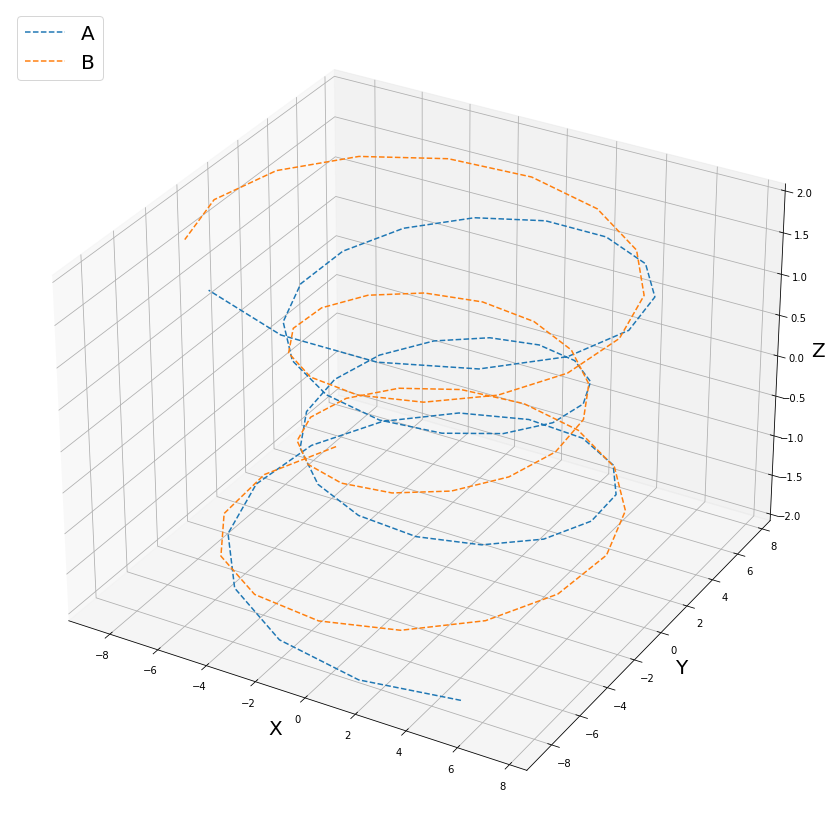

A shape:  (3, 50)
B shape:  (3, 50)


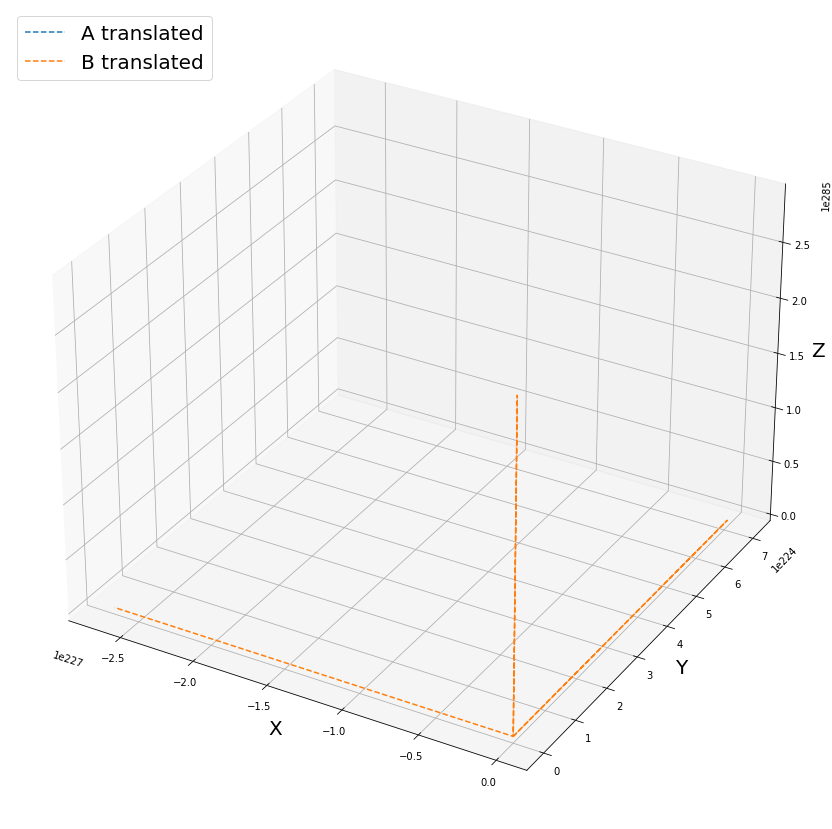

H shape:  (50, 50)
R shape:  (50, 50)
A_rotated shape:  (3, 50)


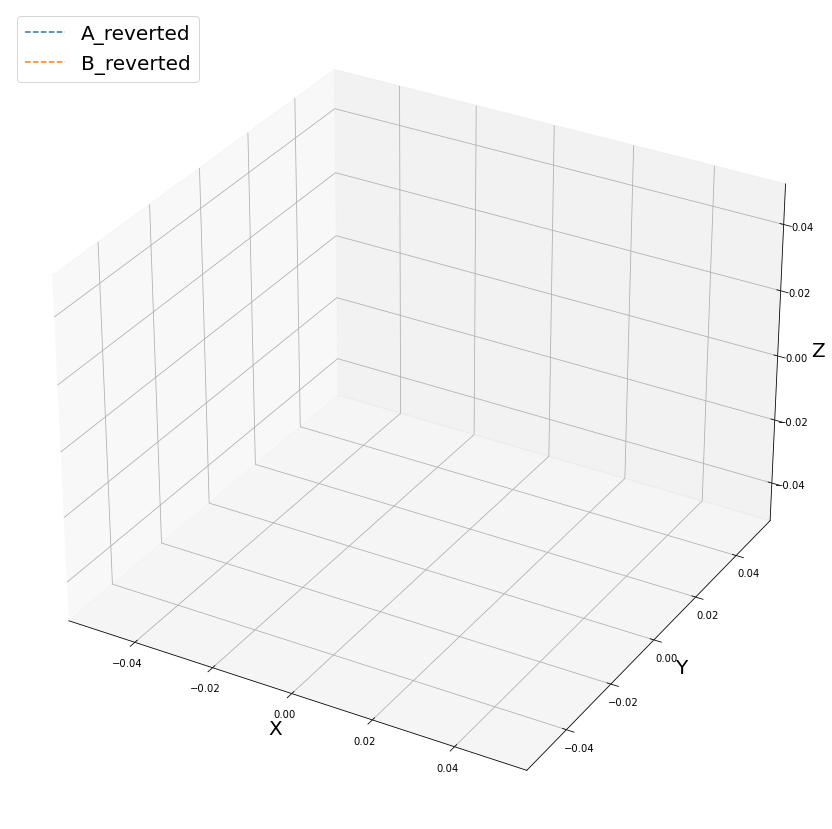

A_reverted shape:  (3, 50)
B_reverted shape:  (3, 50)


In [8]:
run_kabsch()